
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1189]:
#Load libraries
import numpy as np
import pandas as pd

In [1190]:
df=pd.read_csv('train.csv')

In [1191]:
df.shape

(891, 12)

In [1192]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1193]:
survived = float(df[df['Survived']==1]['Age'].mean())
survived = round(survived, 2)
survived

28.34

In [1194]:
died = df[df['Survived']==0]['Age'].mean()
died=round(died,2)
died

30.63

In [1195]:
#Find the average age of those who survived and those who did not
print(f"The average age of those who died was {died} while the average age of those who survived was {survived}")

The average age of those who died was 30.63 while the average age of those who survived was 28.34



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [1196]:
#Your code here 
import sys
import missingno as msno

Bar Chart for Missing Values

<AxesSubplot:>

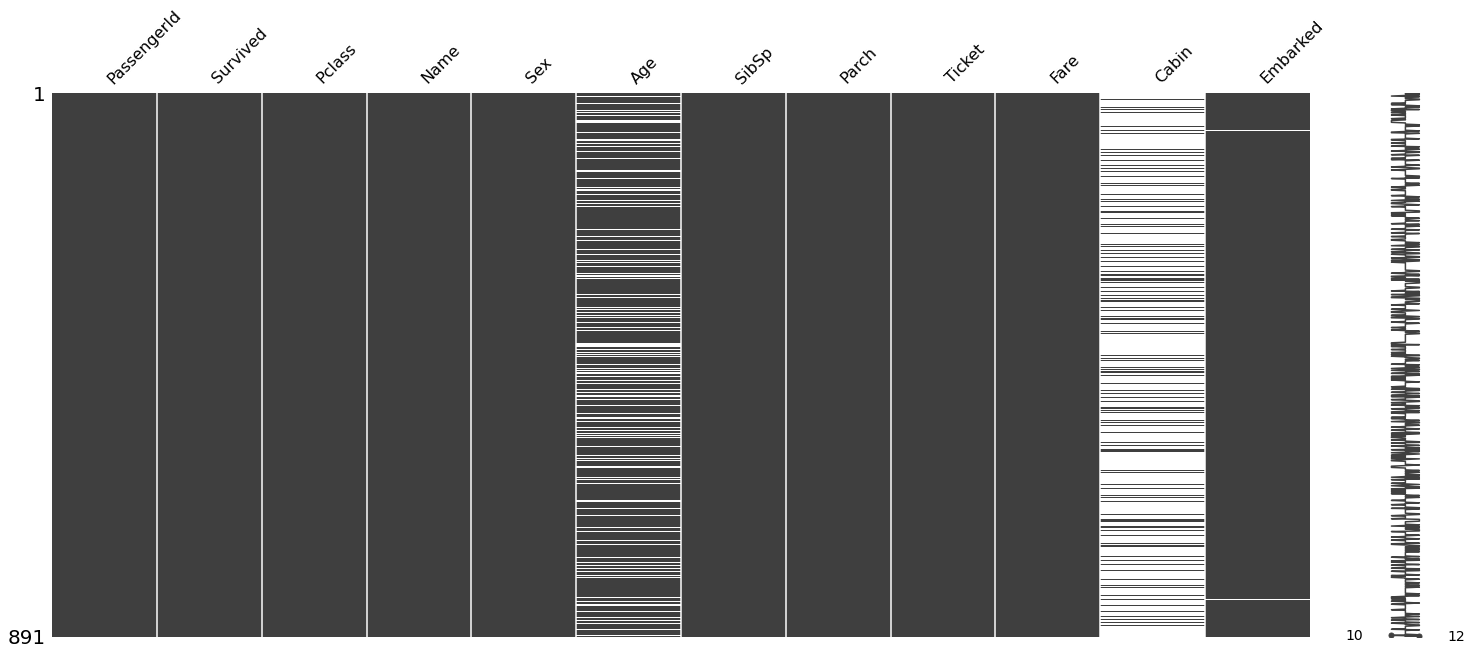

In [1197]:
#Your code here 
%matplotlib inline
msno.matrix(df)
# source https://github.com/ResidentMario/missingno

Which Column has the most NaN values? How many cells in that column are empty?

In [1198]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1199]:
column_na={}

In [1200]:
for i in df.columns:
    column_na[i] = df[i].isna().sum()

In [1201]:
column_na

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

The 'Cabin' column has the most NA values, with 687 empty cells out of 891.

Delete All Rows where Embarked in empty

In [1202]:
#Your code here 
df2 = df.dropna(how='any', subset=['Embarked']) # https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/
df2.shape

(889, 12)

Fill all empty cabins with **¯\\_(ツ)_/¯**

In [1203]:
#Your code here 
df2['Cabin']=df2['Cabin'].fillna('¯\\_(ツ)_/¯')

C:\Users\redoc\AppData\Local\Temp\ipykernel_47612\947688096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cabin']=df2['Cabin'].fillna('¯\\_(ツ)_/¯')


In [1204]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [1205]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S


There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [1206]:
#Your code here 
df2['FamilyCount']=df2['SibSp']+df2['Parch']

C:\Users\redoc\AppData\Local\Temp\ipykernel_47612\1242148589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FamilyCount']=df2['SibSp']+df2['Parch']


In [1207]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0


Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [1208]:
df['Name'][0]

'Braund, Mr. Owen Harris'

In [1209]:
'Braund' in df['Name'][0]

True

In [1210]:
'Rev. ' in df['Name'][0]

False

In [1211]:
#Your code here 
# create a boolean mask
for i in df2['Name']:
    if 'Rev' in i:
        print (i)

Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Carter, Rev. Ernest Courtenay
Kirkland, Rev. Charles Leonard
Harper, Rev. John
Montvila, Rev. Juozas


In [1212]:
rev_filter = df2['Name'].str.contains('Rev')

In [1213]:
df2[rev_filter]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\_(ツ)_/¯,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\_(ツ)_/¯,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\_(ツ)_/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\_(ツ)_/¯,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\_(ツ)_/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\_(ツ)_/¯,S,0


In [1214]:
df2['IsReverend']=rev_filter.map(lambda x: 1 if x == True else 0) # map maps every element in list elementwise
#https://realpython.com/python-lambda/

C:\Users\redoc\AppData\Local\Temp\ipykernel_47612\3140463992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['IsReverend']=rev_filter.map(lambda x: 1 if x == True else 0) # map maps every element in list elementwise


In [1215]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0


In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

- Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [1216]:
#Your code here 
df2['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [1217]:
cqs = pd.get_dummies(df2['Embarked'])
cqs

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [1218]:
df2=pd.concat([df2, cqs], axis =1)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\_(ツ)_/¯,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\_(ツ)_/¯,S,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


- Do the same thing for `Sex`

In [1219]:
#Your code here 
sex = pd.get_dummies(df2['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [1220]:
df2=pd.concat([df2, sex], axis =1)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\_(ツ)_/¯,S,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\_(ツ)_/¯,S,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1


- BONUS: Extract the title from everyone's name and create dummy columns

In [1221]:
#Your code here 
# Titles: Mr Rev Miss Mrs
def title_map(i):
    if 'Mrs' in i: # Mrs must come before Mr in the loop, or Mr will be chosen over Mrs
        return 'Mrs'
    elif 'Mr' in i:
        return 'Mr'
    elif 'Miss' in i: 
        return 'Miss'
    elif 'Rev' in i:
        return 'Rev'  


In [1222]:
#Your code here 
type(df2['Name'][0])

str

In [1223]:
title_map(df2['Name'][0])

'Mr'

In [1224]:
#Your code here 
df2['Title']= list(map(title_map, df2['Name']))

In [1225]:
#Your code here 
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S,female,male,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1,0,1,Mr


In [1226]:
title_dummies = pd.get_dummies(df2['Title'])


In [1227]:
#Your code here
df2=pd.concat([df2, title_dummies], axis =1)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,Mr,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,Mrs,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,Miss,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,1,0,Mrs,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,Mr,0,1,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [1228]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,Mr,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,Mrs,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,Miss,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,1,0,Mrs,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,Mr,0,1,0,0


1. What was the survival rate overall?


In [1229]:
#Your code here 
survive_rate = (df2['Survived'].sum())/(df2.shape[0])
survive_rate=round(survive_rate,3)
survive_rate

0.382

In [1230]:
print(f"The survival rate was {survive_rate}")

The survival rate was 0.382


2. Which gender fared the worst? What was their survival rate?


In [1231]:
male_filter = df2['Sex'] == 'male'
female_filter = df2['Sex'] == 'female'

In [1232]:
df2[male_filter]['Survived'].sum()

109

In [1233]:
df2[male_filter]['Survived'].count()

577

In [1234]:
(df2[male_filter]['Survived'].sum())/(df2[male_filter]['Survived'].count())

0.18890814558058924

In [1235]:
df2[female_filter]['Survived'].sum()

231

In [1236]:
(df2[female_filter]['Survived'].sum())/(df2[female_filter]['Survived'].count())

0.7403846153846154

Males fared the worse. Their survival rate was 0.1889

4. Did any reverends survive? How many?


In [1237]:
#Your code here 
df2[rev_filter]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,...,0,0,1,0,1,Rev,0,0,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,...,0,0,1,0,1,Rev,0,0,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,...,0,0,1,0,1,Rev,0,0,0,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,...,0,1,0,0,1,Rev,0,0,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,...,0,0,1,0,1,Rev,0,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,...,0,0,1,0,1,Rev,0,0,0,1


In [1238]:
df2[rev_filter]['Survived'].sum()

0

No reverends survived.

5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [1239]:
#Your code here 
cabin_filter = df2['Cabin'] == '¯\\_(ツ)_/¯'

In [1240]:
df2[cabin_filter].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,Mr,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,Miss,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,Mr,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,1,0,0,1,Mr,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,1,0,1,None,0,0,0,0


In [1241]:
df2[cabin_filter]['Survived'].sum()/df2[cabin_filter]['Survived'].count()

0.29985443959243085

The survival rate was 0.2998

6. What is the survival rate for people whose `Age` is empty?

In [1242]:
#Your code here 
empty_age = df2['Age'].isnull()

In [1243]:
df2[empty_age].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,1,0,0,1,Mr,0,1,0,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,...,0,0,1,0,1,Mr,0,1,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,1,0,0,1,0,Mrs,0,0,1,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,1,0,0,0,1,Mr,0,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,...,0,1,0,1,0,Miss,1,0,0,0


In [1244]:
df2[empty_age]['Survived'].sum()/df2[empty_age]['Survived'].count()

0.2937853107344633

7. What is the survival rate for each port of embarkation?


In [1245]:
#Your code here 
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'C', 'Q', 'S', 'female', 'male', 'Title', 'Miss', 'Mr',
       'Mrs', 'Rev'],
      dtype='object')

In [1246]:
df2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1247]:
s_filter = df2['Embarked'] == 'S'
c_filter = df2['Embarked'] == 'C'
q_filter = df2['Embarked'] == 'Q'

In [1248]:
s_rate = df2[s_filter]['Survived'].sum()/df2[s_filter]['Survived'].count()
s_rate=round(s_rate,2)

In [1249]:
c_rate = df2[c_filter]['Survived'].sum()/df2[c_filter]['Survived'].count()
c_rate=round(c_rate,2)

In [1250]:
q_rate = df2[q_filter]['Survived'].sum()/df2[q_filter]['Survived'].count()
q_rate=round(q_rate,2)

In [1251]:
print(f'Survival rate at S was {s_rate}, at Q was {q_rate} and at C was {c_rate}')

Survival rate at S was 0.34, at Q was 0.39 and at C was 0.55


8. What is the survival rate for children (under 12) in each `Pclass`?


In [1252]:
#Your code here 
under12 = df2['Age'] < 12

In [1253]:
df2[under12].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,1,0,1,None,0,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,0,0,1,1,0,Miss,1,0,0,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,...,0,1,0,0,1,None,0,0,0,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,...,0,0,1,1,0,Miss,1,0,0,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,...,1,0,0,1,0,Miss,1,0,0,0


In [1254]:
df2[under12]['Survived'].sum()/df2[under12]['Survived'].count()

0.5735294117647058

9. Did the captain of the ship survive? Is he on the list?


In [1255]:
#Your code here 
# The captain was Edward Smith
# https://www.google.com/search?q=titanic+captain&sxsrf=ALiCzsZt__Zr0o3P3FPEuErGrANgZzsU2Q%3A1662710950977&source=hp&ei=pvQaY8uNOe29z7sPlPigGA&iflsig=AJiK0e8AAAAAYxsCtq1hcsPCycFJw_Zgzva_AnpXwbkM&ved=0ahUKEwjL-OD8oIf6AhXt3nMBHRQ8CAMQ4dUDCAo&uact=5&oq=titanic+captain&gs_lcp=Cgdnd3Mtd2l6EAMyCAguEIAEENQCMggILhCABBDUAjIFCC4QgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOgQIIxAnOgUIABCRAjoKCAAQsQMQgwEQQzoRCC4QgAQQsQMQgwEQxwEQ0QM6CwgAEIAEELEDEIMBOgsILhCxAxCDARDUAjoECAAQQzoECC4QQzoQCC4QsQMQxwEQ0QMQ1AIQQzoICAAQsQMQgwE6CAguEIAEELEDOg4ILhCABBCxAxCDARDUAjoUCC4QgAQQsQMQgwEQxwEQrwEQ1AI6BwguELEDEEM6DQguELEDEIMBENQCEEM6CgguELEDENQCEEM6CAgAEIAEELEDOgsILhCABBCxAxCDAToKCAAQgAQQhwIQFFAAWJwSYLUUaABwAHgAgAFciAH1BpIBAjE1mAEAoAEB&sclient=gws-wiz

In [1256]:
df2[male_filter][df2['Name'].str.contains('Edward')]

C:\Users\redoc\AppData\Local\Temp\ipykernel_47612\785597970.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[male_filter][df2['Name'].str.contains('Edward')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,...,0,0,1,0,1,Mr,0,1,0,0
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,...,0,1,0,0,1,None,0,0,0,0
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,...,0,0,1,0,1,Mr,0,1,0,0
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,...,0,0,1,0,1,Mr,0,1,0,0
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,...,1,0,0,0,1,Mr,0,1,0,0
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,...,0,0,1,0,1,Mr,0,1,0,0
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,...,0,0,1,0,1,Mr,0,1,0,0
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,...,0,0,1,0,1,Mr,0,1,0,0
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,...,0,0,1,0,1,Mr,0,1,0,0
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,...,0,0,1,0,1,Mr,0,1,0,0


In [1257]:
df2[male_filter][df2['Name'].str.contains('Cap')]

C:\Users\redoc\AppData\Local\Temp\ipykernel_47612\1911555995.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[male_filter][df2['Name'].str.contains('Cap')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,0,0,1,0,1,None,0,0,0,0


His name was Crosby, Capt. Edward Gifford, he is one the list and he did not survive.

10. Of all the people that died, who had the most expensive ticket? How much did it cost?


In [1258]:
#Your code here 
died = df2['Survived']==0

In [1259]:
df2[died]['Fare'].max()

263.0

In [1260]:
df2[died][df2['Fare']==263]

C:\Users\redoc\AppData\Local\Temp\ipykernel_47612\1647803314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[died][df2['Fare']==263]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Title,Miss,Mr,Mrs,Rev
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,...,0,0,1,0,1,Mr,0,1,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,...,0,0,1,0,1,Mr,0,1,0,0


Two people, Charles Alexander and Mark died and had the most expensive tickets.

11. Does having family on the boat help or hurt your chances of survival?

In [1261]:
df2['FamilyCount'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [1262]:
fam_chance = {}

In [1263]:
#Your code here 
one_fam = df2['FamilyCount']==1

In [1264]:
df2[one_fam]['Survived'].sum()/df2[one_fam]['Survived'].count()

0.5527950310559007

In [1265]:
for i in df2['FamilyCount'].unique():
    fam = df2['FamilyCount']==i
    fam_chance[i]=df2[fam]['Survived'].sum()/df2[fam]['Survived'].count()

In [1266]:
fam_chance

{1: 0.5527950310559007,
 0: 0.30093457943925234,
 4: 0.2,
 2: 0.5784313725490197,
 6: 0.3333333333333333,
 5: 0.13636363636363635,
 3: 0.7241379310344828,
 7: 0.0,
 10: 0.0}

<BarContainer object of 9 artists>

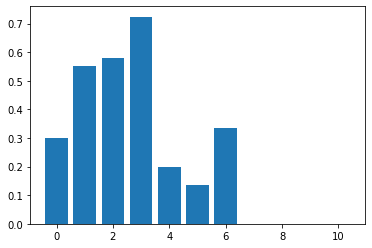

In [1277]:
import matplotlib.pyplot as plt 
plt.bar(fam_chance.keys(),fam_chance.values())
# https://datascience.stackexchange.com/questions/44554/how-to-plot-an-histogram-from-a-dictionary-data

In [1284]:
# FamilyCount of those who died
df2[df2['Survived'] == 0][['FamilyCount']] # unique FamilyCount values [ 1,  0,  4,  2,  6,  5,  3,  7, 10]

,FamilyCount
0,1
4,0
5,0
6,0
7,4
...,...
884,0
885,5
886,0
888,3


Text(0.5, 0, 'FamilyCount')

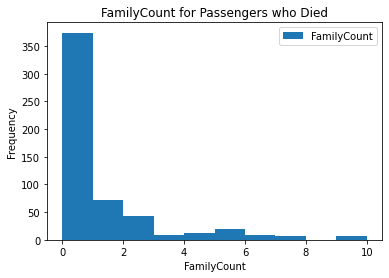

In [1285]:
df2[df2['Survived'] == 0][['FamilyCount']].plot(kind='hist')
plt.title('FamilyCount for Passengers who Died');
plt.xlabel('FamilyCount')

Text(0.5, 0, 'FamilyCount')

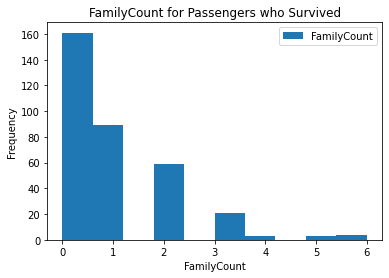

In [1286]:
df2[df2['Survived'] == 1][['FamilyCount']].plot(kind='hist')
plt.title('FamilyCount for Passengers who Survived');
plt.xlabel('FamilyCount')

Having family affects your chances of survival negatively. This cant be seen if we look at absolute values, but if we look at the rate plot, it is clear.

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [1268]:
#Your code here 

In [1269]:
#Your code here 

In [1270]:
#Your code here 

In [1271]:
#Your code here 